# Multiple Linear Regression
2023-01-11

특정 데이터에 대한 예측을 하고자 할 떄 보통 하나 이상의 변수들을 고려해야 한다. 예를 들어서 집 값을 예측을 하고자 한다면, 집의 크기, 주변의 편의 시설, 위치, 화장실의 개수, 건축 년도 등등 고려해야 할 것들이 매우 많다. 

##  1.1 Dataset

사용할 데이터셋 : auto miles per gallon(MPG)

URL : 'https://go.gwu.edu/engcomp6data3'


In [1]:
import pandas
import seaborn
seaborn.set()

In [2]:
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'auto_mpg.csv')

('auto_mpg.csv', <http.client.HTTPMessage at 0x7f42325edd90>)

In [3]:
mpg_data = pandas.read_csv('/content/auto_mpg.csv')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


In [15]:
print("총 데이터 개수: ", mpg_data.shape[0])
print("Feature의 개수: ", mpg_data.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(mpg_data.isnull().sum().sum(), (mpg_data.isnull().sum().sum()*100)/(mpg_data.shape[0]*mpg_data.shape[1])))
print("자동차의 기종의 수: ", mpg_data['car name'].nunique())
for e in mpg_data['car name'].unique():
  if 'malibu' in  e:
    print("자동차의 종류: ", e)
print("자동차가 만들어진 도시의 수: ", mpg_data['origin'].nunique())

총 데이터 개수:  392
Feature의 개수:  9
총 결측치 수: 0 = 전체 데이터의 0.00% 
자동차의 기종의 수:  301
자동차의 종류:  chevrolet chevelle malibu
자동차의 종류:  chevrolet malibu
자동차의 종류:  chevrolet chevelle malibu classic
자동차의 종류:  chevroelt chevelle malibu
자동차의 종류:  chevrolet malibu classic (sw)
자동차가 만들어진 도시의 수:  3


총 392개의 데이터가 있고 9개의 Feature가 있다.

여기서 car name 은 object로 자동차의 기종에 대한 정보를 가지고 있다. 같은 기종임에도 불구하고 다른 형식의 중복 데이터들이 다수 존재한다. 
- 통일된 기종 명으로 변환 Or Drop Columns 등의 전처리가 필요하다. 

origin은 int로 정수 형태이지만 이것이 만들어진 도시로 categorical 한 값이다. (ex. 서울 : 1, 경기 : 2, ... ). 

In [17]:
# car_name & origin drop
y_col = 'mpg'
x_cols = mpg_data.columns.drop(['car name', 'origin', 'mpg'])  # also drop mpg column

print(x_cols)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


## 1.2 Data exploration

자동차의 정보들과 연비와의 1대1 상관관계

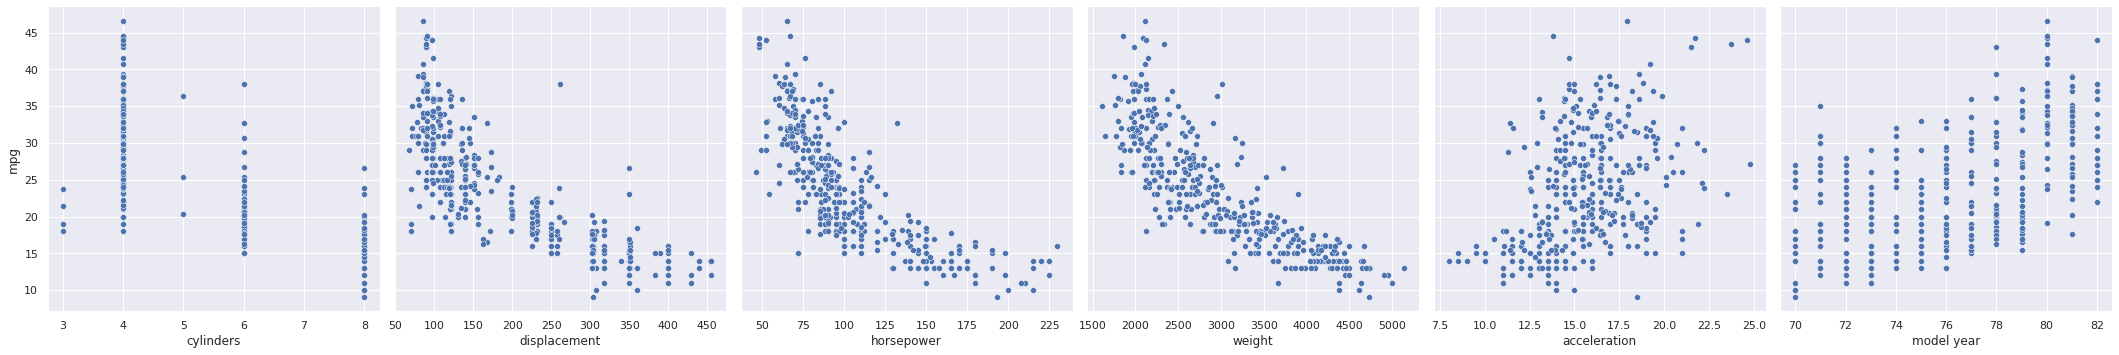

In [18]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1,
             x_vars=x_cols,
             y_vars=y_col);

Accerlation과 model_year 의 정보는 양의 상관관계에 있고 나머지는 음의 상관관계에 있다.
 - linear model 이 연비를 예측하는데 충분하다.

## 1.3 Linear model in matrix form

Multiple linear regression 에서 입력 변수가 $d$개라고 하면 우리가 찾아야 하는 model은 다음과 같다. 
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$$
$\hat{y}$는 예측한 값으로 $x_0=1$ 를 추가해서 위 식을 정리하면 다음과 같다. 
$$\hat{y} = \sum_{i=0}^d w_ix_i = \mathbf{x}^\top \mathbf{w}$$
$\mathbf{x} = (x_0, x_1, ... , x_d)$으로 입력 변수들로 이루어진 벡터이고  $\mathbf{w} = (w_0, w_1, ... , w_d)$로 입력 변수에 곱해지는 계수들로 이루어진 벡터이다. 

$N$개의 데이터에 대한 Linear Regression의 식은 다음과 같다.
$$\hat{y}^{(1)} = w_0x_0^{(1)} + w_1x_1^{(1)} + w_2x_2^{(1)} + ... + w_dx_d^{(1)}$$
$$\hat{y}^{(2)} = w_0x_0^{(2)} + w_1x_1^{(2)} + w_2x_2^{(2)} + ... + w_dx_d^{(2)}$$
$$\vdots$$
$$\hat{y}^{(N)} = w_0x_0^{(N)} + w_1x_1^{(N)} + w_2x_2^{(N)} + ... + w_dx_d^{(N)}$$
최종적으로 위의 식을 한번에 행렬의 형태로 표현하면 다음과 같다.

$$\hat{\mathbf{y}} = \begin{bmatrix}
\hat{y}^{(1)}  \\
\hat{y}^{(2)}\\
\vdots  \\
\hat{y}^{(N)}
\end{bmatrix} =
\begin{bmatrix}
x_0^{(1)} &  x_1^{(1)} & \cdots & x_d^{(1)} \\
x_0^{(2)} &  x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{(N)} &  x_1^{(N)} & \cdots & x_d^{(N)}
\end{bmatrix} \begin{bmatrix}
w_0  \\
w_1\\
\vdots  \\
w_d 
\end{bmatrix} 
= \mathbf{X}\mathbf{w}$$

$\mathbf{x}$ 는 입력 변수들을 행렬의 형태로 나타낸 것으로 맨 앞에 $x_0 = 1$을 추가했었기 때문에 $\mathbf{X}$의 맨 왼쪽 행렬은 1로 이루어져 있다. 

$\hat{\mathbf{y}}$는 예측한 변수들을 모아놓은 벡터이고, $\mathbf{y}$는 실제 연비들을 모아놓은 벡터이다. 

In [19]:
from autograd import numpy
from autograd import grad

In [20]:
X = mpg_data[x_cols].values
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X))  # pad 1s to the left of input matrix
y = mpg_data[y_col].values

print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

X.shape = (392, 7), y.shape = (392,)


cost functio : mean squared error

$$L(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2$$


In [21]:
def linear_regression(params, X):
    '''
    The linear regression model in matrix form.
    Arguments:
      params: 1D array of weights for the linear model
      X     : 2D array of input values
    Returns:
      1D array of predicted values
    '''
    return numpy.dot(X, params)

def cost_function(params, model, X, y):
    '''
    The mean squared error loss function.
    Arguments:
      params: 1D array of weights for the linear model
      model : function for the linear regression model
      X     : 2D array of input values
      y     : 1D array of predicted values
    Returns:
      float, mean squared error
    '''
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) )

## 1.4 Find the weights using gradient descent

In [25]:
gradient = grad(cost_function)

In [26]:
max_iter = 30
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X, y)
    if i%5 == 0:
        print("iteration {}, loss = {}".format(i, loss))

iteration 0, loss = 9.668521029386564e+18
iteration 5, loss = 5.933187473385046e+87
iteration 10, loss = 3.64096169342092e+156
iteration 15, loss = 2.2343136994110975e+225
iteration 20, loss = 1.3711096484197387e+294
iteration 25, loss = inf


<ipython-input-21-241c45fb3580>:24: RuntimeWarning: overflow encountered in square
  return numpy.mean( numpy.sum((y-y_pred)**2) )


## 1.5 Feature scaling

Gradient descent를 진행 중 loss가 무한대로 발산하는 이유는 입력 변수들 중에 특정 값들이 너무 커서 일어난 일이다.

In [27]:
mpg_data[x_cols].describe().loc[['max', 'min']]

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


weight 값이 다른 값과 비교해 크기 때문에 값들을 비슷한 크기를 가지도록 바꿔줄 필요가 있다. 
$$x' = \frac{x - \min(x)}{\max(x)-\min(x)}$$

In [28]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0], 1)), X_scaled)) 

pandas.DataFrame(X_scaled).describe().loc[['max', 'min']]

,0,1,2,3,4,5,6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
max_iter = 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X_scaled, y)
    if i%100 == 0:
        print("iteration {}, loss = {}".format(i, loss))

iteration 0, loss = 116081.11124253299
iteration 100, loss = 5035.737208606848
iteration 200, loss = 4694.653830594688
iteration 300, loss = 4613.631473760375
iteration 400, loss = 4583.327630964672
iteration 500, loss = 4568.155268087917
iteration 600, loss = 4559.268593877387
iteration 700, loss = 4553.692765631068
iteration 800, loss = 4550.09985725416
iteration 900, loss = 4547.761957132873


In [30]:
params

array([ 27.56342896,  -1.24000064,   1.70706502,  -0.2853682 ,
       -23.08358717,   1.06664226,   8.99271696])

In [31]:
y_pred_gd = X_scaled @ params

## 1.6 Model accuracy
Mean absolute error(MAE) & root mean squared error(RMSE)

$$\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N \left\vert y^{(i)} - \hat{y}^{(i)}\right\vert$$
$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) =\sqrt{ \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}$$

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred_gd)
rmse = mean_squared_error(y, y_pred_gd, squared=False)
print("mae  = {}".format(mae))
print("rmse = {}".format(rmse))

mae  = 2.613991601156043
rmse = 3.40552056741184


## 2. Gradient descent land global temperature anomaly dataset


In [35]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f4229fa0b20>)

In [33]:
import numpy
import sympy

In [36]:
fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

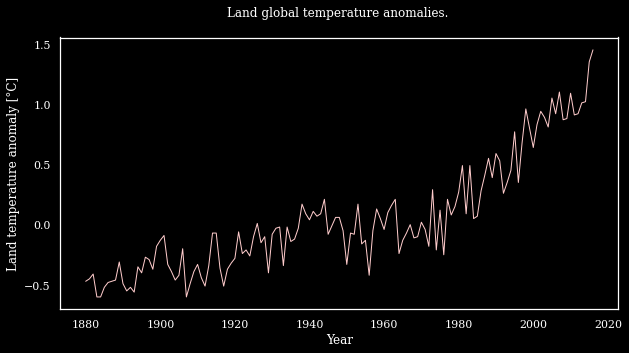

In [38]:
from matplotlib import pyplot
%matplotlib inline

pyplot.rc('font', family='serif', size='18')
pyplot.style.use('dark_background')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#FCC', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

직선 정의 : 

$$f(x_i) = wx + b$$

cost function 정의 : 

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

In [39]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function     

(b + w*x - y)**2

In [40]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

In [41]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year,temp_anomaly))/len(year)
    descent_w = numpy.sum(grad_w(w,b,year,temp_anomaly))/len(year)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

nan
nan


<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in multiply
  return (2*x*(b + w*x - y))
<ipython-input-41-3901486ab873>:7: RuntimeWarning: invalid value encountered in double_scalars
  w = w - descent_w*0.001 # with 0.01 the step size


Z-Score normalization

$$x' = \frac{x - \text{mean}(x)}{\text{std}(x)}$$


In [42]:
year_scaled = (year - year.mean())/year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

In [43]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    descent_w = numpy.sum(grad_w(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

0.756766964479979
5.551763428541569e-17


In [44]:
reg = b + w * year_scaled

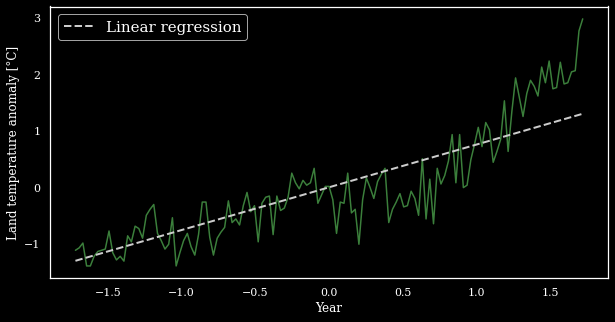

In [48]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#7F7', linestyle='-', linewidth=1.5, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', color='#CCC', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();